In [7]:
import numpy as np
from sklearn.datasets import twenty_newsgroups

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold


import matplotlib.pyplot as plt

%matplotlib inline

from twenty_newsgroups import make_cv_results, plot_prec_rec, plot_confusion

In [2]:
# raw = twenty_newsgroups.fetch_20newsgroups(subset='train')
vectorized = twenty_newsgroups.fetch_20newsgroups_vectorized(subset='train')

X = vectorized.data
y = vectorized.target
classes = vectorized.target_names

### Is class balance an issue?

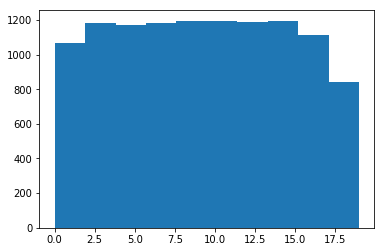

In [3]:
plt.hist(y);

Doesn't look too bad

### Ok onto actual modeling. 

# Simply MultinomialNB

In [5]:
results = make_cv_results(MultinomialNB(), X, y)

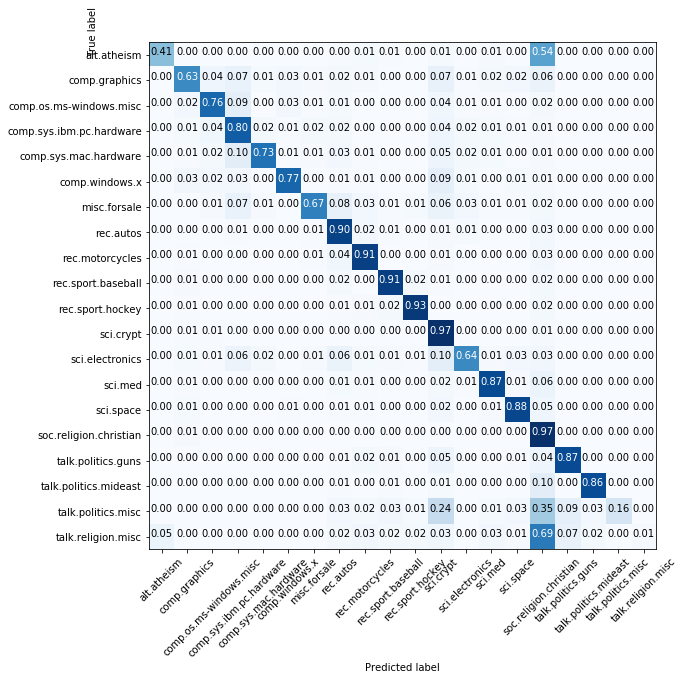

In [7]:
plot_confusion(results['true'], results['pred'], classes, figsize=(20, 20))

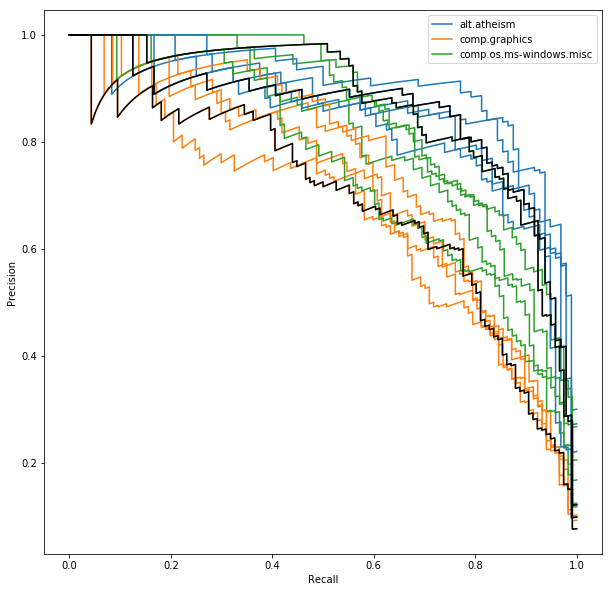

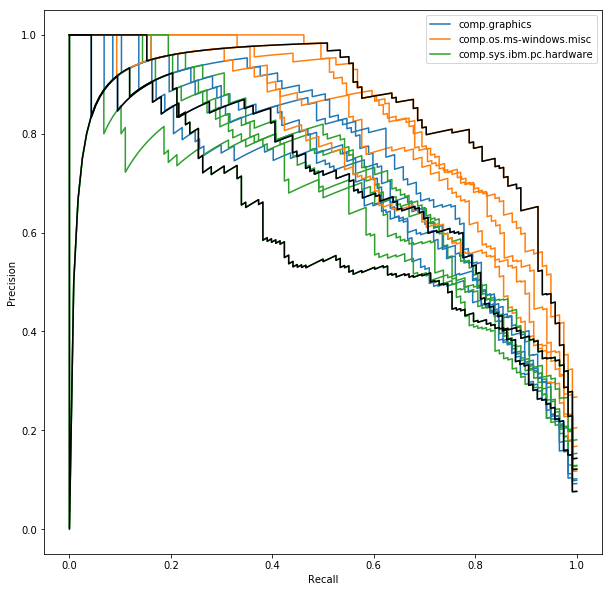

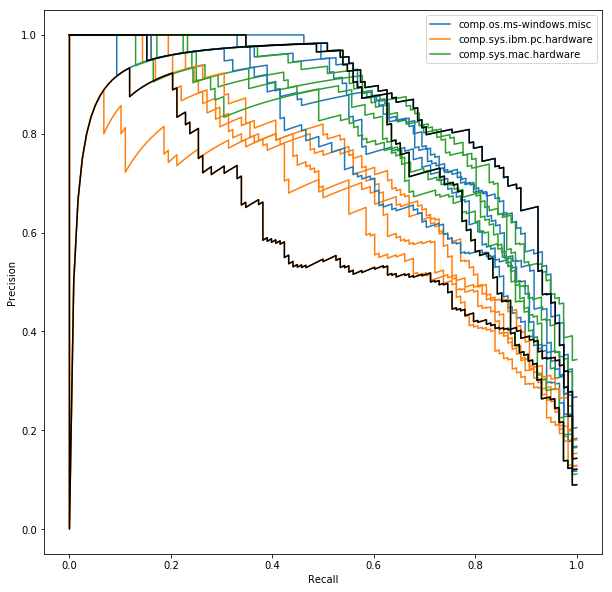

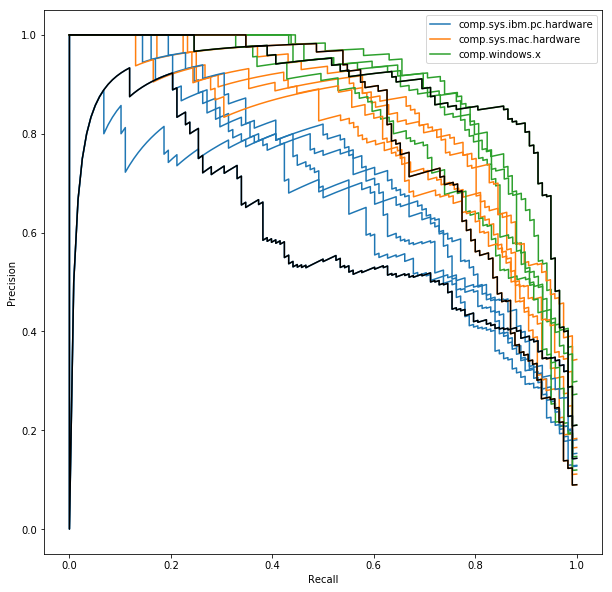

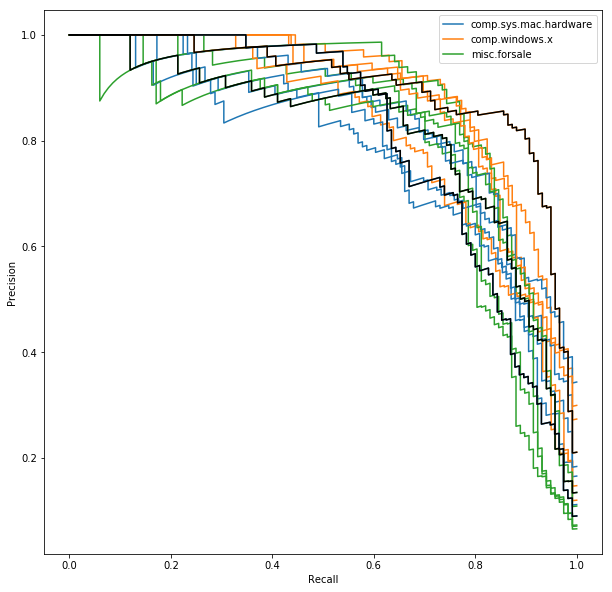

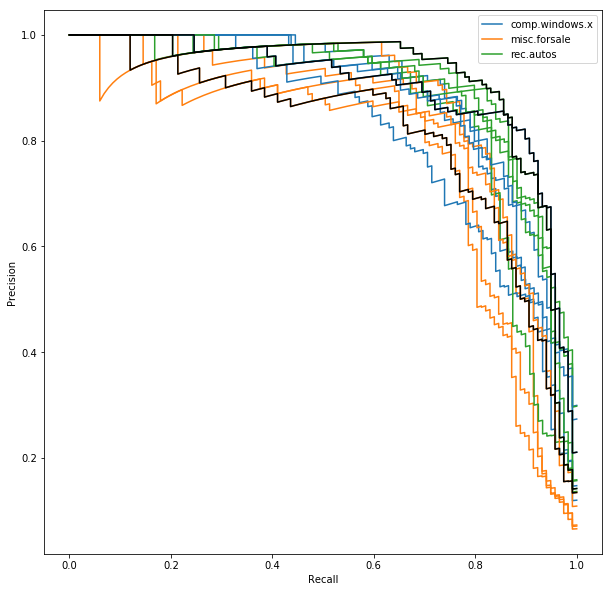

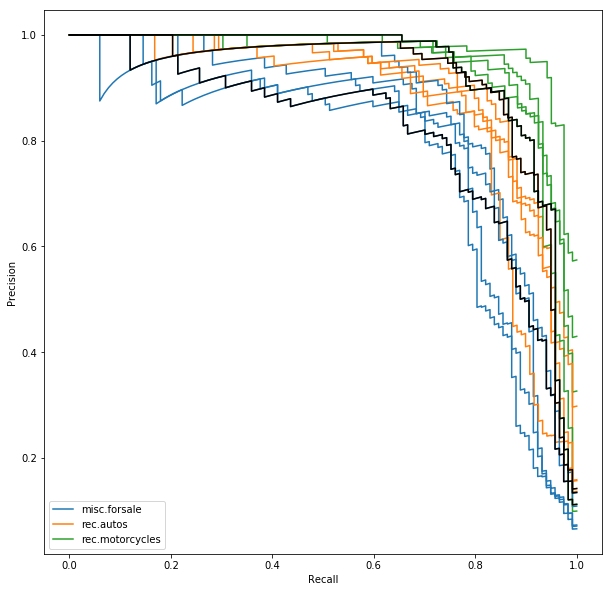

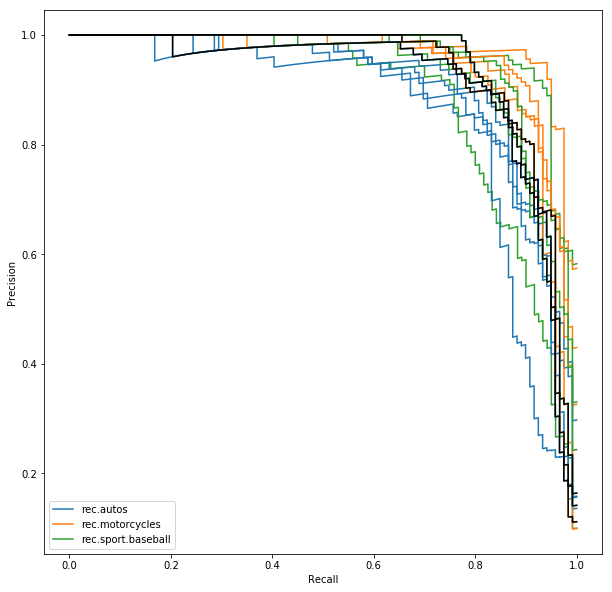

In [32]:
labels_per = 3
for i in range(8):
    y_pred_sub = [j[:, i: i+labels_per] for j in results['pred']]
    y_true_sub = [j[:, i: i+labels_per] for j in results['true']]
    plot_prec_rec(y_true_sub, y_pred_sub, classes[i:i+labels_per], figsize=(10, 10))

# Simply Voting classifier (logregpca, ComplementaryNB, MultinomialNB, SVC)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler

In [11]:
logregpca = Pipeline([
    ('pca', TruncatedSVD(n_components=25)),
    ('logreg', LogisticRegression(solver='saga', n_jobs=-1))
])

calsvc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('calsvc', CalibratedClassifierCV(SGDClassifier(n_jobs=-1), cv=5))
])

mnb = MultinomialNB()
cnb = ComplementNB()
vt = VotingClassifier([
    ('logregpca', logregpca),
    ('cnb', cnb),
    ('mnb', mnb),
    ('svc', calsvc)
], weights=[.3, .2, .2, .3], voting='soft')

In [8]:
results = make_cv_results(vt, X, y)

/Users/ryan/miniconda3/envs/vector_ai/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/ryan/miniconda3/envs/vector_ai/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ryan/miniconda3/envs/vector_ai/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 

/Users/ryan/miniconda3/envs/vector_ai/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ryan/miniconda3/envs/vector_ai/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ryan/miniconda3/envs/vector_ai/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specif

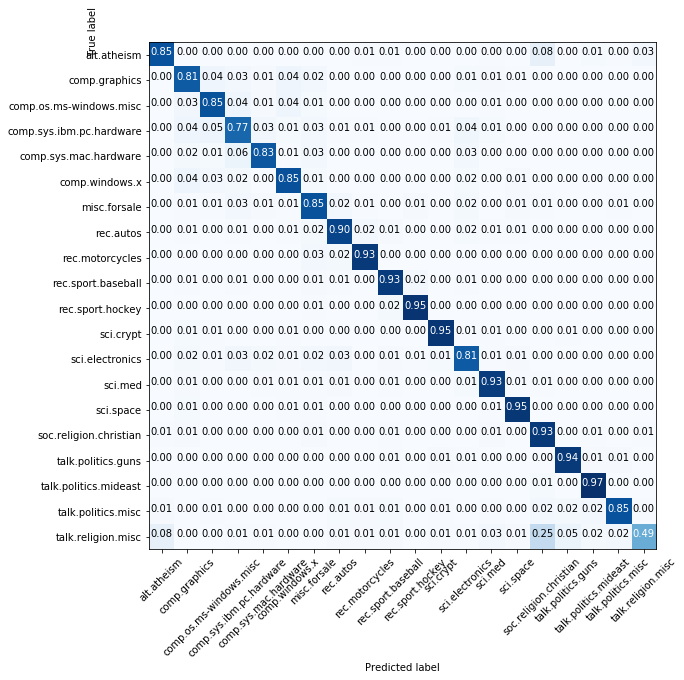

In [12]:
plot_confusion(results['true'], results['pred'], classes, figsize=(20, 20))

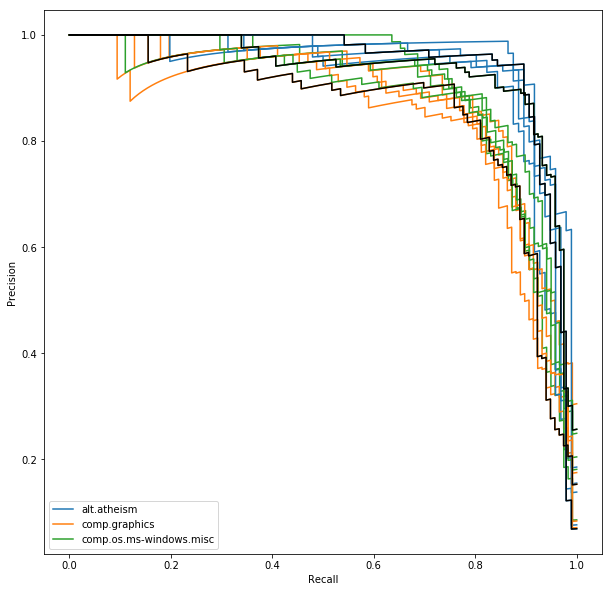

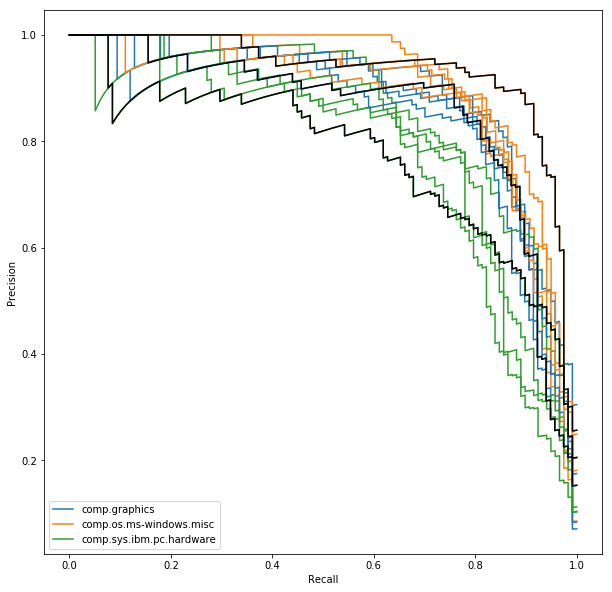

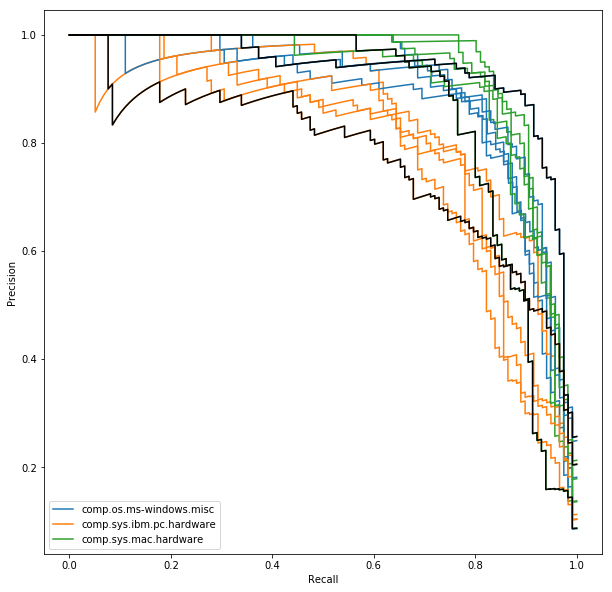

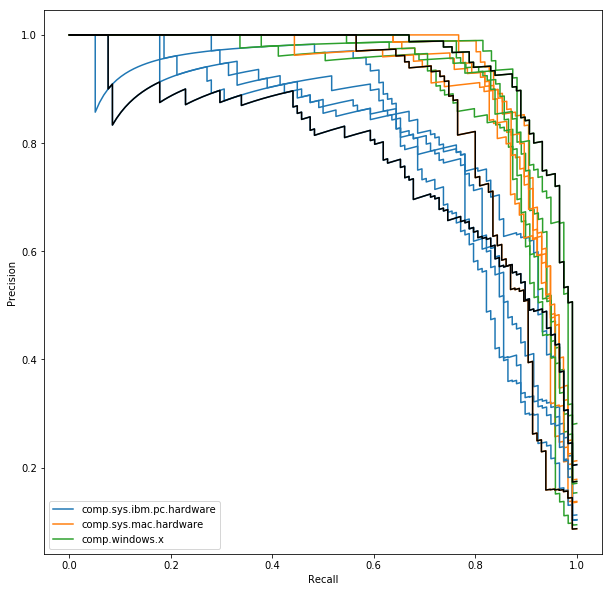

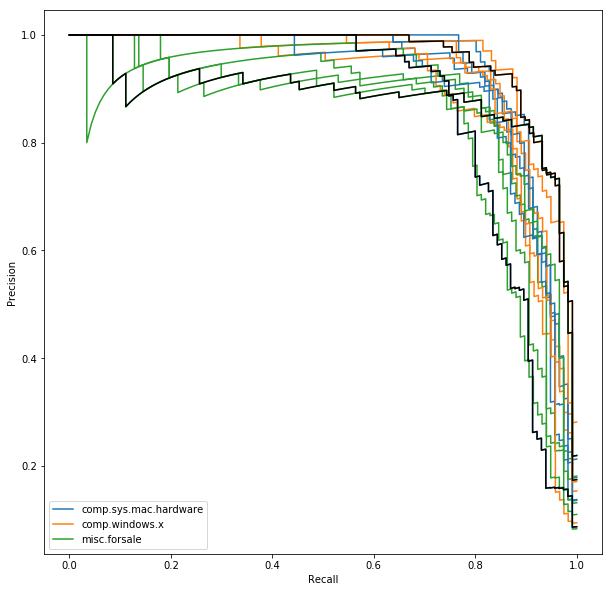

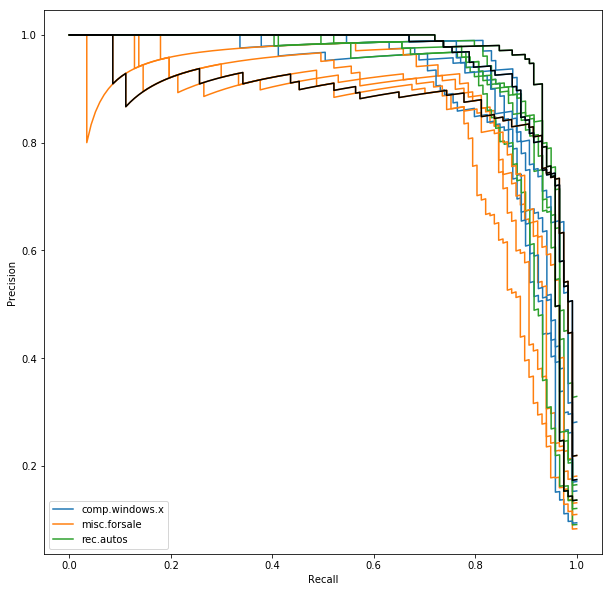

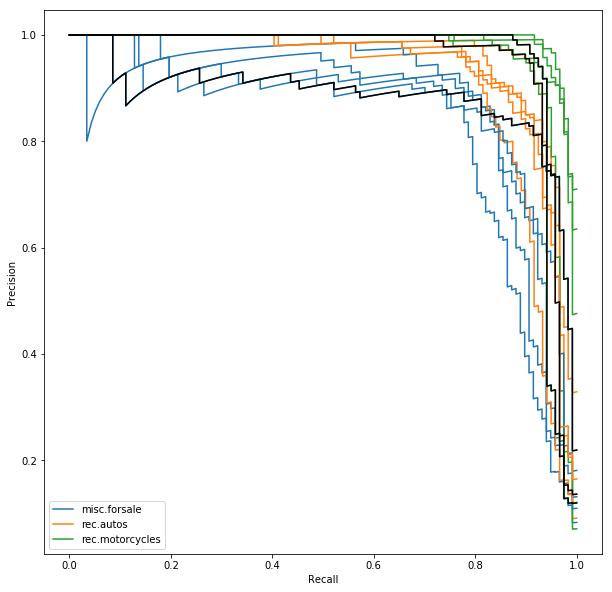

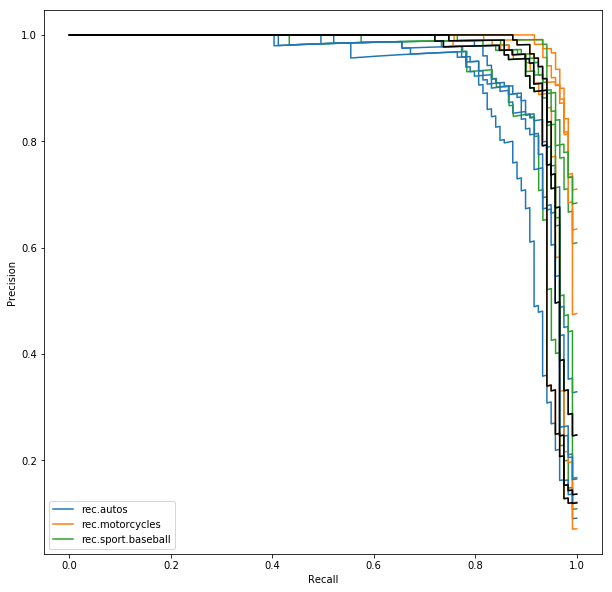

In [13]:
labels_per = 3
for i in range(8):
    y_pred_sub = [j[:, i: i+labels_per] for j in results['pred']]
    y_true_sub = [j[:, i: i+labels_per] for j in results['true']]
    plot_prec_rec(y_true_sub, y_pred_sub, classes[i:i+labels_per], figsize=(10, 10))

# Well that's a lot better!